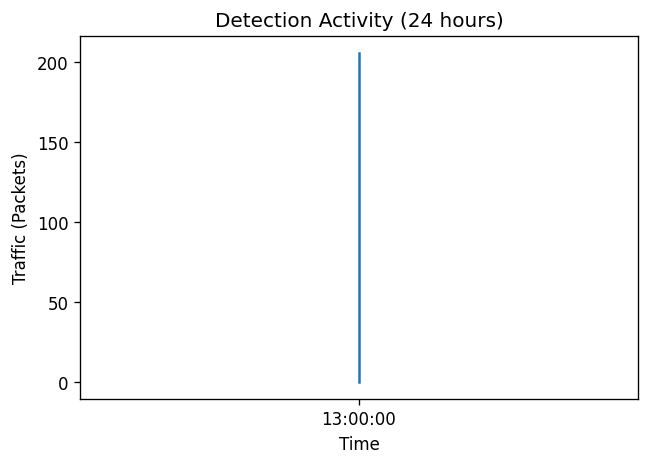

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

todays_date = np.datetime64('today')
csv_path = "test.csv"
csv = pd.read_csv(csv_path)
packets = pd.DataFrame(csv)
packets
fig, ax = plt.subplots(dpi=120)
ax = plt.gca()

packets['date'] = pd.to_datetime(packets['date'], yearfirst=True)
packets = packets.loc[(packets['date'] == todays_date)]
packet_time = pd.to_datetime(packets['time'], format='%H:%M:%S').dt.strftime('%H').add(':00:00')
ax.plot(packet_time, packets.index)
ax.set_xlabel("Time")
ax.set_ylabel("Traffic (Packets)")
plt.title('Detection Activity (24 hours)')
plt.show()

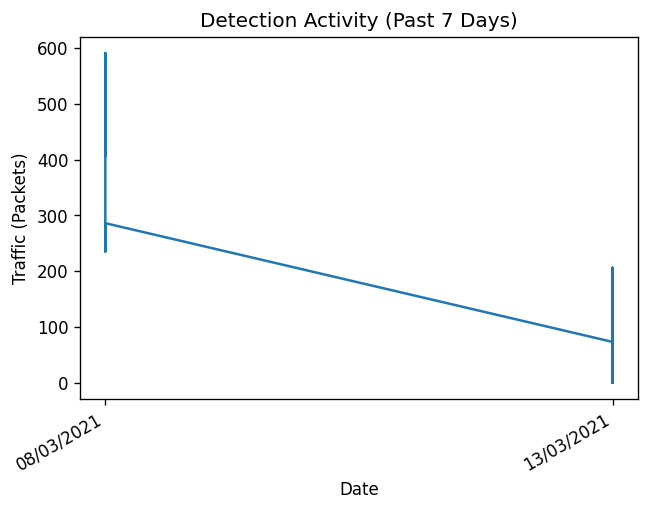

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

seven_days_ago_date = np.datetime64('today') - pd.to_timedelta("7day")
csv_path = "test.csv"
csv = pd.read_csv(csv_path)
packets = pd.DataFrame(csv)
packets
fig, ax = plt.subplots(dpi=120)
ax = plt.gca()

packets['date'] = pd.to_datetime(packets['date'], yearfirst=True)
packets = packets.sort_values(by='date', ascending=True)
packets = packets.loc[(packets['date'] > seven_days_ago_date)]
ax.plot((packets['date'].dt.strftime('%d/%m/%Y')), packets.index)
ax.set_xlabel("Date")
ax.set_ylabel("Traffic (Packets)")
plt.title('Detection Activity (Past 7 Days)')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

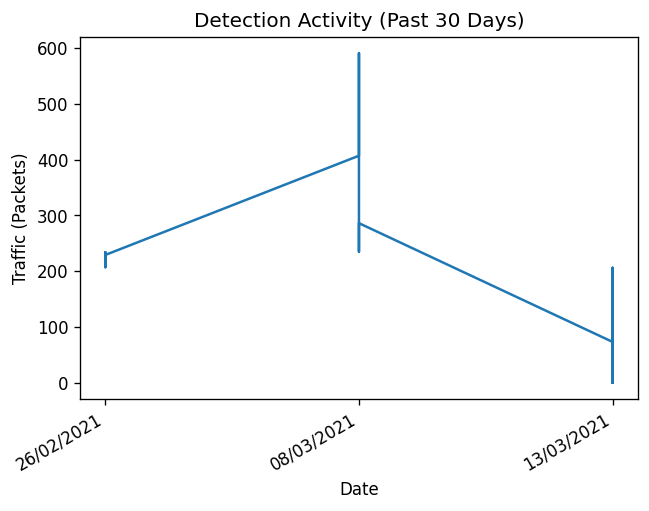

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

seven_days_ago_date = np.datetime64('today') - pd.to_timedelta("30day")
csv_path = "test.csv"
csv = pd.read_csv(csv_path)
packets = pd.DataFrame(csv)
packets
fig, ax = plt.subplots(dpi=120)
ax = plt.gca()

packets['date'] = pd.to_datetime(packets['date'], yearfirst=True)
packets = packets.sort_values(by='date', ascending=True)
packets = packets.loc[(packets['date'] > seven_days_ago_date)]
ax.plot((packets['date'].dt.strftime('%d/%m/%Y')), packets.index)
ax.set_xlabel("Date")
ax.set_ylabel("Traffic (Packets)")
plt.title('Detection Activity (Past 30 Days)')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()